In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt

pd.options.display.float_format='{:.2f}'.format

fec = pd.read_csv('P00000001-ALL.csv')

# Donation statistics by occupation and employer

In [ ]:
unique_cands = fec.cand_nm.unique()

parties = {'Bachmann, Michelle': 'Republican',
    'Cain, Herman': 'Republican',
    'Gingrich, Newt': 'Republican',
    'Huntsman, Jon': 'Republican',
    'Johnson, Gary Earl': 'Republican',
    'McCotter, Thaddeus G': 'Republican',
    'Obama, Barack': 'Democrat',
    'Paul, Ron': 'Republican',
    'Pawlenty, Timothy': 'Republican',
    'Perry, Rick': 'Republican',
    "Roemer, Charles E. 'Buddy' III": 'Republican',
    'Romney, Mitt': 'Republican',
    'Santorum, Rick': 'Republican'}

fec['party'] = fec.cand_nm.map(parties)

fec = fec[fec.contb_receipt_amt > 0]
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
    }
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
    }
f = lambda x: emp_mapping.get(x, x)
fec['contbr_employer'] = fec.contbr_employer.map(f)

by_occupation = fec.pivot_table('contb_receipt_amt',
    index='contbr_occupation', columns='party', aggfunc='sum')

over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

over_2mm.plot(kind='barh')

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
# Order totals by key in descending order
    return totals.sort_values(ascending=False)[-n:]

grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

# Bucketing donation amounts

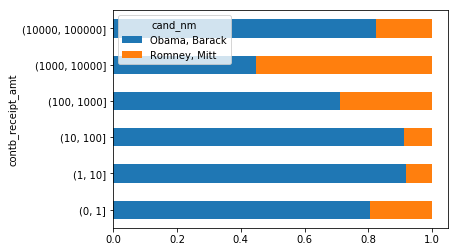

In [28]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums[:-2].plot(kind='barh', stacked=True)

# Donation statistics by state

In [34]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
percent = totals.div(totals.sum(1), axis=0)

'''
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
from matplotlib import rcParams
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
from shapelib import ShapeFile
import dbflib
obama = percent['Obama, Barack']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
lllat = 21; urlat = 53; lllon = -118; urlon = -62
m = Basemap(ax=ax, projection='stere',
lon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2,
llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon,
urcrnrlon=urlon, resolution='l')
m.drawcoastlines()
m.drawcountries()
shp = ShapeFile('../states/statesp020')
dbf = dbflib.open('../states/statesp020')
for npoly in range(shp.info()[0]):
    # Draw colored polygons on the map
    shpsegs = []
    shp_object = shp.read_object(npoly)
    verts = shp_object.vertices()
    rings = len(verts)
    for ring in range(rings):
        lons, lats = zip(*verts[ring])
        x, y = m(lons, lats)
        shpsegs.append(zip(x,y))
        if ring == 0:
            shapedict = dbf.read_record(npoly)
        name = shapedict['STATE']
    lines = LineCollection(shpsegs,antialiaseds=(1,))
    # state_to_code dict, e.g. 'ALASKA' -> 'AK', omitted
    try:
        per = obama[state_to_code[name.upper()]]
    except KeyError:
        continue
        
    lines.set_facecolors('k')
    lines.set_alpha(0.75 * per) # Shrink the percentage a bit
    lines.set_edgecolors('k')
    lines.set_linewidth(0.3)
    ax.add_collection(lines)
    
plt.show()
'''

"\nfrom mpl_toolkits.basemap import Basemap, cm\nimport numpy as np\nfrom matplotlib import rcParams\nfrom matplotlib.collections import LineCollection\nimport matplotlib.pyplot as plt\nfrom shapelib import ShapeFile\nimport dbflib\nobama = percent['Obama, Barack']\nfig = plt.figure(figsize=(12, 12))\nax = fig.add_axes([0.1,0.1,0.8,0.8])\nlllat = 21; urlat = 53; lllon = -118; urlon = -62\nm = Basemap(ax=ax, projection='stere',\nlon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2,\nllcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon,\nurcrnrlon=urlon, resolution='l')\nm.drawcoastlines()\nm.drawcountries()\nshp = ShapeFile('../states/statesp020')\ndbf = dbflib.open('../states/statesp020')\nfor npoly in range(shp.info()[0]):\n    # Draw colored polygons on the map\n    shpsegs = []\n    shp_object = shp.read_object(npoly)\n    verts = shp_object.vertices()\n    rings = len(verts)\n    for ring in range(rings):\n        lons, lats = zip(*verts[ring])\n        x, y = m(lons, lats)\n        s